In [316]:
# importamos librerias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import LinearRegression


In [317]:
# importamos el test y el train

train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

# comprobamos que se han importado correctamente

train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,15148661,4.499810,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,flexible,True,...,40.757349,-73.921339,Sunny Spacious Apt in Astoria w/ back yard access,Astoria,9,96.0,https://a0.muscache.com/im/pictures/3e40924b-7...,11101,1.0,1.0
1,1227528,3.970292,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Futon,strict,True,...,40.823556,-73.954573,Manhattan Sunny Private Room,Hamilton Heights,8,100.0,https://a0.muscache.com/im/pictures/2953dddd-0...,10031,1.0,1.0
2,15692740,4.787492,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",""Wheel...",4,1.0,Real Bed,moderate,True,...,40.689306,-73.955478,Sweet Apartment on Quiet Block,Bedford-Stuyvesant,12,100.0,NaN,11205,1.0,1.0
3,19115685,4.700480,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",3,NaN,Real Bed,moderate,False,...,40.681965,-73.965490,Husband & Wife Art-Filled Apartment,Clinton Hill,2,90.0,https://a0.muscache.com/im/pictures/81766960/b...,11238.0,1.0,1.0
4,2554110,5.192957,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",3,1.0,Real Bed,strict,True,...,40.742842,-73.957554,Luxurious 1 Bedroom Apt!,Long Island City,1,80.0,https://a0.muscache.com/im/pictures/0ed6ee9e-6...,11101,1.0,1.0


In [318]:
test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,20332537,Condominium,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,2.5,Real Bed,moderate,True,LA,...,34.087167,-118.122115,Cozy Condominium,Alhambra,7,93.0,https://a0.muscache.com/im/pictures/62134148-b...,91801,3.0,4.0
1,10653901,Apartment,Entire home/apt,"{TV,""Wireless Internet"",Kitchen,""Indoor firepl...",4,1.5,Real Bed,moderate,True,LA,...,33.994951,-118.467552,"AK Venice Loft, Roof deck, yard, bikes @ 21 Palms",Venice,50,97.0,NaN,90291,1.0,1.0
2,21173707,Dorm,Shared room,"{Internet,""Wireless Internet"",Kitchen,Heating,...",1,NaN,Real Bed,strict,False,SF,...,37.794184,-122.405819,Shelli's Student Home4(1 Month Min),Chinatown,6,100.0,https://a0.muscache.com/im/pictures/5676690/30...,94108,1.0,1.0
3,16861419,Apartment,Private room,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",2,1.0,Real Bed,flexible,False,SF,...,37.775893,-122.425973,Large bedroom in Hayes Valley,Hayes Valley,0,NaN,https://a0.muscache.com/im/pictures/a201a661-a...,94102,1.0,1.0
4,16411627,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,Boston,...,42.348399,-71.156963,Large 1Bed w/ Gorgeous Kitchen + Bath,Allston-Brighton,49,87.0,https://a0.muscache.com/im/pictures/27186847/d...,02135,1.0,2.0


In [319]:
train.shape, test.shape

((59288, 29), (14823, 28))

In [320]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59288 entries, 0 to 59287
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      59288 non-null  int64  
 1   log_price               59288 non-null  float64
 2   property_type           59288 non-null  object 
 3   room_type               59288 non-null  object 
 4   amenities               59288 non-null  object 
 5   accommodates            59288 non-null  int64  
 6   bathrooms               59139 non-null  float64
 7   bed_type                59288 non-null  object 
 8   cancellation_policy     59288 non-null  object 
 9   cleaning_fee            59288 non-null  bool   
 10  city                    59288 non-null  object 
 11  description             59288 non-null  object 
 12  first_review            46601 non-null  object 
 13  host_has_profile_pic    59148 non-null  object 
 14  host_identity_verified  59148 non-null

In [321]:
train.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,5.928800e+04,59288.000000,59288.000000,59139.000000,59288.000000,59288.000000,59288.00000,45922.000000,59211.000000,59188.000000
mean,1.125616e+07,4.782881,3.154247,1.236333,38.443183,-92.445128,20.86380,94.087953,1.265187,1.712154
std,6.086810e+06,0.719573,2.148722,0.584359,3.078562,21.719249,37.83484,7.828948,0.852805,1.255901
min,3.440000e+02,0.000000,1.000000,0.000000,33.339002,-122.511500,0.00000,20.000000,0.000000,0.000000
25%,6.259172e+06,4.317488,2.000000,1.000000,34.128427,-118.343263,1.00000,92.000000,1.000000,1.000000
50%,1.223218e+07,4.709530,2.000000,1.000000,40.661277,-76.998096,6.00000,96.000000,1.000000,1.000000
75%,1.640644e+07,5.220356,4.000000,1.000000,40.745829,-73.954753,23.00000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.00000,100.000000,10.000000,16.000000


C:\Users\luiso\AppData\Local\Temp\ipykernel_17696\3926196898.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(train.corr(), dtype=bool))    # mascara para tapar lo de arriba
C:\Users\luiso\AppData\Local\Temp\ipykernel_17696\3926196898.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),


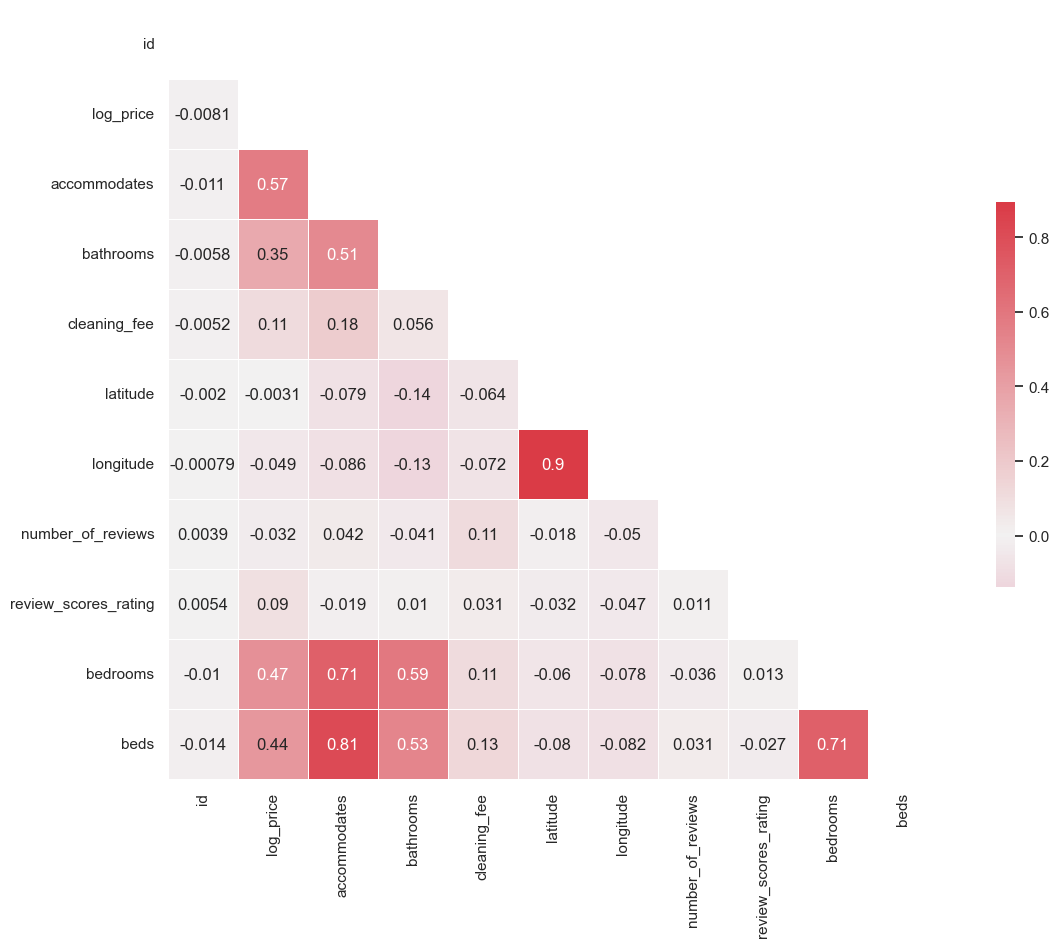

In [322]:
# buscando colinealidad

plt.figure(figsize=(15, 10))   # 150x100 pixeles

sns.set(style='white')    # estilo blanco

mask=np.triu(np.ones_like(train.corr(), dtype=bool))    # mascara para tapar lo de arriba

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de  colores


sns.heatmap(train.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [323]:
# contamos los valorres de property_type

top_10 = train['property_type'].value_counts().head(10)

top_10

Apartment          39158
House              13295
Condominium         2103
Townhouse           1341
Loft                 992
Other                469
Guesthouse           401
Bed & Breakfast      372
Bungalow             297
Villa                142
Name: property_type, dtype: int64

In [324]:
# reasingamos el nombre Other a los valores que no estan en el top 10

train['property_type'] = train['property_type'].apply(lambda x: x if x in top_10 else 'Other')

# comprobamos que se ha hecho correctamente

train['property_type'].value_counts()

Apartment          39158
House              13295
Condominium         2103
Townhouse           1341
Other               1187
Loft                 992
Guesthouse           401
Bed & Breakfast      372
Bungalow             297
Villa                142
Name: property_type, dtype: int64

In [325]:
# ahora convertimos las variables categoricas en numericas con LabelEncoder

le = LabelEncoder()

train['property_type'] = le.fit_transform(train['property_type'])

train['property_type'].value_counts()

0    39158
5    13295
3     2103
8     1341
7     1187
6      992
4      401
1      372
2      297
9      142
Name: property_type, dtype: int64

In [326]:
# hacemos lo mismo con el test

test['property_type'] = test['property_type'].apply(lambda x: x if x in top_10 else 'Other')

test['property_type'].value_counts()

test['property_type'] = le.fit_transform(test['property_type'])

test['property_type'].value_counts()

0    9845
5    3216
3     555
8     351
7     311
6     252
4      97
1      90
2      69
9      37
Name: property_type, dtype: int64

In [327]:
# contamos los valores de room_type

train['room_type'].value_counts()

Entire home/apt    33043
Private room       24509
Shared room         1736
Name: room_type, dtype: int64

In [328]:
# convertimos las variables categoricas en numericas con LabelEncoder

train['room_type'] = le.fit_transform(train['room_type'])

train['room_type'].value_counts()

0    33043
1    24509
2     1736
Name: room_type, dtype: int64

In [329]:
# hacemos lo mismo con el test

test['room_type'].value_counts()

test['room_type'] = le.fit_transform(test['room_type'])

test['room_type'].value_counts()

0    8267
1    6129
2     427
Name: room_type, dtype: int64

In [330]:
# separamos los elementos de la columna amenities

train['amenities'] = train['amenities'].apply(lambda x: x.replace('{', '').replace('}', '').replace('"', ''))

train['amenities'].head()

0    TV,Internet,Wireless Internet,Air conditioning...
1    Internet,Wireless Internet,Air conditioning,Ki...
2    Wireless Internet,Air conditioning,Wheelchair ...
3    Internet,Wireless Internet,Air conditioning,Wh...
4    TV,Wireless Internet,Air conditioning,Kitchen,...
Name: amenities, dtype: object

In [331]:
# hacer lo mismo con el test

test['amenities'] = test['amenities'].apply(lambda x: x.replace('{', '').replace('}', '').replace('"', ''))

test['amenities'].head()

0    TV,Internet,Wireless Internet,Air conditioning...
1    TV,Wireless Internet,Kitchen,Indoor fireplace,...
2    Internet,Wireless Internet,Kitchen,Heating,Was...
3    TV,Internet,Wireless Internet,Kitchen,Heating,...
4    TV,Cable TV,Internet,Wireless Internet,Air con...
Name: amenities, dtype: object

In [332]:
train['amenities'].value_counts()

# creamos una lista con todos los amenities

amenities = []

for i in train['amenities']:
    amenities.extend(i.split(','))
    
amenities = list(set(amenities))

amenities

['',
 'Single level home',
 'Smoking allowed',
 'Waterfront',
 'Cable TV',
 'Host greets you',
 'Washer',
 'Self Check-In',
 'Ethernet connection',
 'Children’s dinnerware',
 'translation missing: en.hosting_amenity_50',
 'Shampoo',
 'Washer / Dryer',
 'Hot water',
 'Window guards',
 'Handheld shower head',
 'Family/kid friendly',
 'Dog(s)',
 'Flat',
 'Step-free access',
 'Essentials',
 'Pets allowed',
 'Wide entryway',
 'Stair gates',
 'Long term stays allowed',
 'Grab-rails for shower and toilet',
 'Indoor fireplace',
 'Bathtub',
 'Hot water kettle',
 'Hand or paper towel',
 'Refrigerator',
 'Other pet(s)',
 'Firm matress',
 'Heating',
 'Dryer',
 'Toilet paper',
 'Lockbox',
 'Body soap',
 'Hot tub',
 'Luggage dropoff allowed',
 'Free parking on premises',
 'Pack ’n Play/travel crib',
 'First aid kit',
 'Hair dryer',
 'Stove',
 'Microwave',
 'Smart lock',
 'Hangers',
 'Private bathroom',
 'Changing table',
 'Pool',
 'Beach essentials',
 'Ground floor access',
 'Keypad',
 'Well-lit pat

In [333]:
# hacemos lo mismo con el test

amenities_test = []

for i in test['amenities']:
    amenities_test.extend(i.split(','))

amenities_test = list(set(amenities_test))

amenities_test

['',
 'Single level home',
 'Smoking allowed',
 'Waterfront',
 'Cable TV',
 'Host greets you',
 'Washer',
 'Self Check-In',
 'Ethernet connection',
 'Children’s dinnerware',
 'translation missing: en.hosting_amenity_50',
 'Shampoo',
 'Washer / Dryer',
 'Hot water',
 'Window guards',
 'Handheld shower head',
 'Family/kid friendly',
 'Dog(s)',
 'Flat',
 'Step-free access',
 'Essentials',
 'Pets allowed',
 'Wide entryway',
 'Stair gates',
 'Long term stays allowed',
 'Indoor fireplace',
 'Bathtub',
 'Hot water kettle',
 'Refrigerator',
 'Other pet(s)',
 'Firm matress',
 'Heating',
 'Dryer',
 'Lockbox',
 'Hot tub',
 'Luggage dropoff allowed',
 'Free parking on premises',
 'First aid kit',
 'Pack ’n Play/travel crib',
 'Hair dryer',
 'Smart lock',
 'Microwave',
 'Stove',
 'Hangers',
 'Private bathroom',
 'Changing table',
 'Pool',
 'Beach essentials',
 'Ground floor access',
 'Keypad',
 'Well-lit path to entrance',
 'Patio or balcony',
 'Wide clearance to shower & toilet',
 'Lake access',
 

In [334]:
# integrar los amenities en el dataframe train como variables dummy

for i in amenities:
    train[i] = train['amenities'].apply(lambda x: 1 if i in x else 0)

train.head()

C:\Users\luiso\AppData\Local\Temp\ipykernel_17696\2805619059.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[i] = train['amenities'].apply(lambda x: 1 if i in x else 0)
C:\Users\luiso\AppData\Local\Temp\ipykernel_17696\2805619059.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[i] = train['amenities'].apply(lambda x: 1 if i in x else 0)
C:\Users\luiso\AppData\Local\Temp\ipykernel_17696\2805619059.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,Wide hallway clearance,Wide clearance to shower and toilet,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,15148661,4.499810,0,0,"TV,Internet,Wireless Internet,Air conditioning...",2,1.0,Real Bed,flexible,True,...,0,0,0,0,0,0,0,0,0,0
1,1227528,3.970292,0,1,"Internet,Wireless Internet,Air conditioning,Ki...",2,1.0,Futon,strict,True,...,0,0,0,0,1,0,0,0,0,0
2,15692740,4.787492,0,0,"Wireless Internet,Air conditioning,Wheelchair ...",4,1.0,Real Bed,moderate,True,...,0,0,0,0,0,1,1,0,0,0
3,19115685,4.700480,0,0,"Internet,Wireless Internet,Air conditioning,Wh...",3,NaN,Real Bed,moderate,False,...,0,0,0,0,0,0,0,0,0,0
4,2554110,5.192957,0,0,"TV,Wireless Internet,Air conditioning,Kitchen,...",3,1.0,Real Bed,strict,True,...,0,0,0,0,1,0,0,0,0,0


In [335]:
# hacemos lo mismo con el test

for i in amenities_test:
    test[i] = test['amenities'].apply(lambda x: 1 if i in x else 0)

test.head()

C:\Users\luiso\AppData\Local\Temp\ipykernel_17696\2288622097.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[i] = test['amenities'].apply(lambda x: 1 if i in x else 0)
C:\Users\luiso\AppData\Local\Temp\ipykernel_17696\2288622097.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[i] = test['amenities'].apply(lambda x: 1 if i in x else 0)
C:\Users\luiso\AppData\Local\Temp\ipykernel_17696\2288622097.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Lock on bedroom door,Wide hallway clearance,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,20332537,3,0,"TV,Internet,Wireless Internet,Air conditioning...",6,2.5,Real Bed,moderate,True,LA,...,0,0,0,0,1,0,0,0,0,0
1,10653901,0,0,"TV,Wireless Internet,Kitchen,Indoor fireplace,...",4,1.5,Real Bed,moderate,True,LA,...,0,0,0,0,0,0,0,0,0,0
2,21173707,7,2,"Internet,Wireless Internet,Kitchen,Heating,Was...",1,NaN,Real Bed,strict,False,SF,...,0,0,0,0,0,0,0,0,0,0
3,16861419,0,1,"TV,Internet,Wireless Internet,Kitchen,Heating,...",2,1.0,Real Bed,flexible,False,SF,...,0,0,0,0,0,0,0,0,0,0
4,16411627,5,0,"TV,Cable TV,Internet,Wireless Internet,Air con...",4,1.0,Real Bed,moderate,True,Boston,...,0,0,0,0,1,0,0,0,0,0


In [336]:
# eliminamos la columna amenities y description

train.drop(['amenities', 'description'], axis=1, inplace=True)

train.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Wide hallway clearance,Wide clearance to shower and toilet,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,15148661,4.499810,0,0,2,1.0,Real Bed,flexible,True,NYC,...,0,0,0,0,0,0,0,0,0,0
1,1227528,3.970292,0,1,2,1.0,Futon,strict,True,NYC,...,0,0,0,0,1,0,0,0,0,0
2,15692740,4.787492,0,0,4,1.0,Real Bed,moderate,True,NYC,...,0,0,0,0,0,1,1,0,0,0
3,19115685,4.700480,0,0,3,NaN,Real Bed,moderate,False,NYC,...,0,0,0,0,0,0,0,0,0,0
4,2554110,5.192957,0,0,3,1.0,Real Bed,strict,True,NYC,...,0,0,0,0,1,0,0,0,0,0


In [337]:
# hacemos lo mismo con el test

test.drop(['amenities', 'description'], axis=1, inplace=True)

test.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,Lock on bedroom door,Wide hallway clearance,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,20332537,3,0,6,2.5,Real Bed,moderate,True,LA,2016-03-23,...,0,0,0,0,1,0,0,0,0,0
1,10653901,0,0,4,1.5,Real Bed,moderate,True,LA,2013-08-16,...,0,0,0,0,0,0,0,0,0,0
2,21173707,7,2,1,NaN,Real Bed,strict,False,SF,2012-07-04,...,0,0,0,0,0,0,0,0,0,0
3,16861419,0,1,2,1.0,Real Bed,flexible,False,SF,NaN,...,0,0,0,0,0,0,0,0,0,0
4,16411627,5,0,4,1.0,Real Bed,moderate,True,Boston,2013-10-07,...,0,0,0,0,1,0,0,0,0,0


In [338]:
# rellenar los valores nulos del dataframe con la moda de cada columna

train.fillna(train.mode().iloc[0], inplace=True)

train.head()


,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Wide hallway clearance,Wide clearance to shower and toilet,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,15148661,4.499810,0,0,2,1.0,Real Bed,flexible,True,NYC,...,0,0,0,0,0,0,0,0,0,0
1,1227528,3.970292,0,1,2,1.0,Futon,strict,True,NYC,...,0,0,0,0,1,0,0,0,0,0
2,15692740,4.787492,0,0,4,1.0,Real Bed,moderate,True,NYC,...,0,0,0,0,0,1,1,0,0,0
3,19115685,4.700480,0,0,3,1.0,Real Bed,moderate,False,NYC,...,0,0,0,0,0,0,0,0,0,0
4,2554110,5.192957,0,0,3,1.0,Real Bed,strict,True,NYC,...,0,0,0,0,1,0,0,0,0,0


In [339]:
# hacemos lo mismo con el test

test.fillna(test.mode().iloc[0], inplace=True)

test.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,Lock on bedroom door,Wide hallway clearance,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,20332537,3,0,6,2.5,Real Bed,moderate,True,LA,2016-03-23,...,0,0,0,0,1,0,0,0,0,0
1,10653901,0,0,4,1.5,Real Bed,moderate,True,LA,2013-08-16,...,0,0,0,0,0,0,0,0,0,0
2,21173707,7,2,1,1.0,Real Bed,strict,False,SF,2012-07-04,...,0,0,0,0,0,0,0,0,0,0
3,16861419,0,1,2,1.0,Real Bed,flexible,False,SF,2017-01-01,...,0,0,0,0,0,0,0,0,0,0
4,16411627,5,0,4,1.0,Real Bed,moderate,True,Boston,2013-10-07,...,0,0,0,0,1,0,0,0,0,0


In [340]:
# eliminar las columnas name y thumbnail_url

train.drop(['name', 'thumbnail_url'], axis=1, inplace=True)

train.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Wide hallway clearance,Wide clearance to shower and toilet,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,15148661,4.499810,0,0,2,1.0,Real Bed,flexible,True,NYC,...,0,0,0,0,0,0,0,0,0,0
1,1227528,3.970292,0,1,2,1.0,Futon,strict,True,NYC,...,0,0,0,0,1,0,0,0,0,0
2,15692740,4.787492,0,0,4,1.0,Real Bed,moderate,True,NYC,...,0,0,0,0,0,1,1,0,0,0
3,19115685,4.700480,0,0,3,1.0,Real Bed,moderate,False,NYC,...,0,0,0,0,0,0,0,0,0,0
4,2554110,5.192957,0,0,3,1.0,Real Bed,strict,True,NYC,...,0,0,0,0,1,0,0,0,0,0


In [341]:
# hacemos lo mismo con el test

test.drop(['name', 'thumbnail_url'], axis=1, inplace=True)

test.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,Lock on bedroom door,Wide hallway clearance,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,20332537,3,0,6,2.5,Real Bed,moderate,True,LA,2016-03-23,...,0,0,0,0,1,0,0,0,0,0
1,10653901,0,0,4,1.5,Real Bed,moderate,True,LA,2013-08-16,...,0,0,0,0,0,0,0,0,0,0
2,21173707,7,2,1,1.0,Real Bed,strict,False,SF,2012-07-04,...,0,0,0,0,0,0,0,0,0,0
3,16861419,0,1,2,1.0,Real Bed,flexible,False,SF,2017-01-01,...,0,0,0,0,0,0,0,0,0,0
4,16411627,5,0,4,1.0,Real Bed,moderate,True,Boston,2013-10-07,...,0,0,0,0,1,0,0,0,0,0


In [342]:
#convertir cleaning_fee en 0 y 1

train['cleaning_fee'] = train['cleaning_fee'].apply(lambda x: 1 if x == True else 0)

train.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Wide hallway clearance,Wide clearance to shower and toilet,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,15148661,4.499810,0,0,2,1.0,Real Bed,flexible,1,NYC,...,0,0,0,0,0,0,0,0,0,0
1,1227528,3.970292,0,1,2,1.0,Futon,strict,1,NYC,...,0,0,0,0,1,0,0,0,0,0
2,15692740,4.787492,0,0,4,1.0,Real Bed,moderate,1,NYC,...,0,0,0,0,0,1,1,0,0,0
3,19115685,4.700480,0,0,3,1.0,Real Bed,moderate,0,NYC,...,0,0,0,0,0,0,0,0,0,0
4,2554110,5.192957,0,0,3,1.0,Real Bed,strict,1,NYC,...,0,0,0,0,1,0,0,0,0,0


In [343]:
# hacemos lo mismo con el test

test['cleaning_fee'] = test['cleaning_fee'].apply(lambda x: 1 if x == True else 0)

test.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,Lock on bedroom door,Wide hallway clearance,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,20332537,3,0,6,2.5,Real Bed,moderate,1,LA,2016-03-23,...,0,0,0,0,1,0,0,0,0,0
1,10653901,0,0,4,1.5,Real Bed,moderate,1,LA,2013-08-16,...,0,0,0,0,0,0,0,0,0,0
2,21173707,7,2,1,1.0,Real Bed,strict,0,SF,2012-07-04,...,0,0,0,0,0,0,0,0,0,0
3,16861419,0,1,2,1.0,Real Bed,flexible,0,SF,2017-01-01,...,0,0,0,0,0,0,0,0,0,0
4,16411627,5,0,4,1.0,Real Bed,moderate,1,Boston,2013-10-07,...,0,0,0,0,1,0,0,0,0,0


In [344]:
# convertir los valores de bed_type en numericos con LabelEncoder

train['bed_type'] = le.fit_transform(train['bed_type'])

train['bed_type'].value_counts()

4    57607
2      610
3      483
0      370
1      218
Name: bed_type, dtype: int64

In [345]:
#hacemos lo mismo con el test

test['bed_type'] = le.fit_transform(test['bed_type'])

test['bed_type'].value_counts()

4    14421
2      143
0      107
3      102
1       50
Name: bed_type, dtype: int64

In [346]:
#convertir los valores de cancellation_policy en numericos con LabelEncoder

train['cancellation_policy'] = le.fit_transform(train['cancellation_policy'])

train['cancellation_policy'].value_counts()

2    25812
0    18067
1    15298
3       96
4       15
Name: cancellation_policy, dtype: int64

In [347]:
# hacemos lo mismo con el test

test['cancellation_policy'] = le.fit_transform(test['cancellation_policy'])

test['cancellation_policy'].value_counts()

2    6562
0    4478
1    3765
3      16
4       2
Name: cancellation_policy, dtype: int64

In [348]:
# convertir los valores de city en numericos con LabelEncoder

train['city'] = le.fit_transform(train['city'])

train['city'].value_counts()

train.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Wide hallway clearance,Wide clearance to shower and toilet,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,15148661,4.499810,0,0,2,1.0,4,0,1,4,...,0,0,0,0,0,0,0,0,0,0
1,1227528,3.970292,0,1,2,1.0,2,2,1,4,...,0,0,0,0,1,0,0,0,0,0
2,15692740,4.787492,0,0,4,1.0,4,1,1,4,...,0,0,0,0,0,1,1,0,0,0
3,19115685,4.700480,0,0,3,1.0,4,1,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2554110,5.192957,0,0,3,1.0,4,2,1,4,...,0,0,0,0,1,0,0,0,0,0


In [349]:
# hacemos lo mismo con el test

test['city'] = le.fit_transform(test['city'])

test['city'].value_counts()

test.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,Lock on bedroom door,Wide hallway clearance,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,20332537,3,0,6,2.5,4,1,1,3,2016-03-23,...,0,0,0,0,1,0,0,0,0,0
1,10653901,0,0,4,1.5,4,1,1,3,2013-08-16,...,0,0,0,0,0,0,0,0,0,0
2,21173707,7,2,1,1.0,4,2,0,5,2012-07-04,...,0,0,0,0,0,0,0,0,0,0
3,16861419,0,1,2,1.0,4,0,0,5,2017-01-01,...,0,0,0,0,0,0,0,0,0,0
4,16411627,5,0,4,1.0,4,1,1,0,2013-10-07,...,0,0,0,0,1,0,0,0,0,0


In [350]:
# convertimos los valores t y f de host_has_profile_pic en 1 y 0

train['host_has_profile_pic'] = train['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)

train['host_has_profile_pic'].value_counts()

# convertimos los valores t y f de host_identity_verified en 1 y 0

train['host_identity_verified'] = train['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)

train['host_identity_verified'].value_counts()

# convertimos los valores t y f de instant_bookable en 1 y 0

train['instant_bookable'] = train['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)

train['instant_bookable'].value_counts()

train.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Wide hallway clearance,Wide clearance to shower and toilet,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,15148661,4.499810,0,0,2,1.0,4,0,1,4,...,0,0,0,0,0,0,0,0,0,0
1,1227528,3.970292,0,1,2,1.0,2,2,1,4,...,0,0,0,0,1,0,0,0,0,0
2,15692740,4.787492,0,0,4,1.0,4,1,1,4,...,0,0,0,0,0,1,1,0,0,0
3,19115685,4.700480,0,0,3,1.0,4,1,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2554110,5.192957,0,0,3,1.0,4,2,1,4,...,0,0,0,0,1,0,0,0,0,0


In [351]:
# hacemos lo mismo con el test

test['host_has_profile_pic'] = test['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)

test['host_has_profile_pic'].value_counts()

test['host_identity_verified'] = test['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)

test['host_identity_verified'].value_counts()

test['instant_bookable'] = test['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)

test['instant_bookable'].value_counts()

test.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,Lock on bedroom door,Wide hallway clearance,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,20332537,3,0,6,2.5,4,1,1,3,2016-03-23,...,0,0,0,0,1,0,0,0,0,0
1,10653901,0,0,4,1.5,4,1,1,3,2013-08-16,...,0,0,0,0,0,0,0,0,0,0
2,21173707,7,2,1,1.0,4,2,0,5,2012-07-04,...,0,0,0,0,0,0,0,0,0,0
3,16861419,0,1,2,1.0,4,0,0,5,2017-01-01,...,0,0,0,0,0,0,0,0,0,0
4,16411627,5,0,4,1.0,4,1,1,0,2013-10-07,...,0,0,0,0,1,0,0,0,0,0


In [352]:
# convertimos los valores de neighbourhood en numericos con LabelEncoder

train['neighbourhood'] = le.fit_transform(train['neighbourhood'])

train['neighbourhood'].value_counts()

597    7799
43     1686
83     1281
548    1151
242    1112
       ... 
93        1
18        1
144       1
457       1
599       1
Name: neighbourhood, Length: 611, dtype: int64

In [353]:
# hacemos lo mismo con el test

test['neighbourhood'] = le.fit_transform(test['neighbourhood'])

test['neighbourhood'].value_counts()

492    1935
34      480
66      320
283     295
201     277
       ... 
474       1
134       1
99        1
168       1
95        1
Name: neighbourhood, Length: 504, dtype: int64

In [354]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59288 entries, 0 to 59287
Columns: 156 entries, id to Suitable for events
dtypes: float64(7), int32(6), int64(138), object(5)
memory usage: 69.2+ MB


In [355]:
# encontramos las columnas de tipo object

train.select_dtypes(include=['object']).columns

Index(['first_review', 'host_response_rate', 'host_since', 'last_review',
       'zipcode'],
      dtype='object')

In [356]:
# eliminamos las columnas 'first_review', 'host_response_rate', 'host_since', 'last_review', 'zipcode'

train.drop(['first_review', 'host_response_rate', 'host_since', 'last_review', 'zipcode'], axis=1, inplace=True)

train.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Wide hallway clearance,Wide clearance to shower and toilet,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,15148661,4.499810,0,0,2,1.0,4,0,1,4,...,0,0,0,0,0,0,0,0,0,0
1,1227528,3.970292,0,1,2,1.0,2,2,1,4,...,0,0,0,0,1,0,0,0,0,0
2,15692740,4.787492,0,0,4,1.0,4,1,1,4,...,0,0,0,0,0,1,1,0,0,0
3,19115685,4.700480,0,0,3,1.0,4,1,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2554110,5.192957,0,0,3,1.0,4,2,1,4,...,0,0,0,0,1,0,0,0,0,0


In [357]:
# hacemos lo mismo con el test

test.drop(['first_review', 'host_response_rate', 'host_since', 'last_review', 'zipcode'], axis=1, inplace=True)

test.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,Lock on bedroom door,Wide hallway clearance,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,20332537,3,0,6,2.5,4,1,1,3,1,...,0,0,0,0,1,0,0,0,0,0
1,10653901,0,0,4,1.5,4,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2,21173707,7,2,1,1.0,4,2,0,5,1,...,0,0,0,0,0,0,0,0,0,0
3,16861419,0,1,2,1.0,4,0,0,5,1,...,0,0,0,0,0,0,0,0,0,0
4,16411627,5,0,4,1.0,4,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


(<Axes: >,)

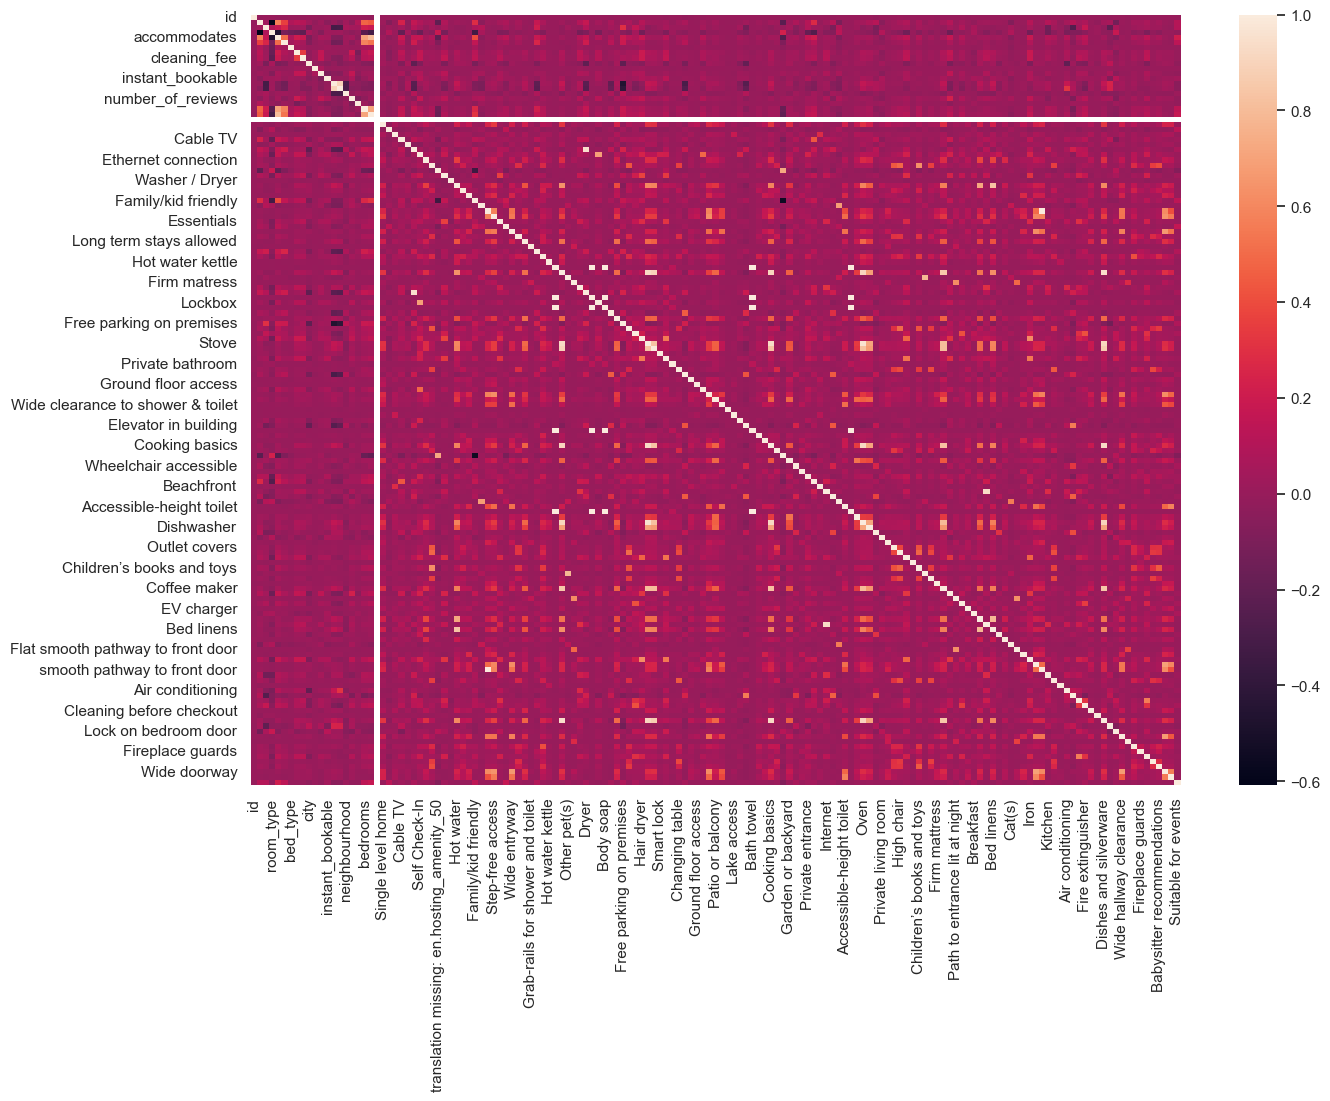

In [358]:
# ahora que todo nuestro dataframe es numerico, hacemos un heatmap para ver la correlacion

plt.figure(figsize=(15, 10))   # 150x100 pixeles

sns.set(style='white')    # estilo blanco

mask=np.triu(np.ones_like(train.corr(), dtype=bool))    # mascara para tapar lo de arriba

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de  colores


sns.heatmap(train.corr()),

In [359]:
train.shape, test.shape

((59288, 151), (14823, 141))

In [360]:
test.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,Lock on bedroom door,Wide hallway clearance,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,20332537,3,0,6,2.5,4,1,1,3,1,...,0,0,0,0,1,0,0,0,0,0
1,10653901,0,0,4,1.5,4,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2,21173707,7,2,1,1.0,4,2,0,5,1,...,0,0,0,0,0,0,0,0,0,0
3,16861419,0,1,2,1.0,4,0,0,5,1,...,0,0,0,0,0,0,0,0,0,0
4,16411627,5,0,4,1.0,4,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [361]:
# separamos la columna price del dataframe train_scaled

y_train = train['log_price']

X_train = train.drop(['log_price'], axis=1)

X_train.shape

(59288, 150)

In [362]:
# hacemos una lista de las columnas del dataframe test_scaled

columnas = list(test.columns)

columnas

# eliminamos las columnas de x_train que no estan en test_scaled a traves de una iteracion

for i in X_train.columns:
    if i not in columnas:
        X_train.drop([i], axis=1, inplace=True)

X_train.shape, test.shape

((59288, 141), (14823, 141))

In [363]:
# ordenamos las columnas de X_train para que coincidan con las de test_scaled

X_train = X_train[columnas]

X_train.shape, test.shape

X_train.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,Lock on bedroom door,Wide hallway clearance,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,15148661,0,0,2,1.0,4,0,1,4,1,...,0,0,0,0,0,0,0,0,0,0
1,1227528,0,1,2,1.0,2,2,1,4,1,...,1,0,0,0,1,0,0,0,0,0
2,15692740,0,0,4,1.0,4,1,1,4,1,...,0,0,0,0,0,1,1,0,0,0
3,19115685,0,0,3,1.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,0
4,2554110,0,0,3,1.0,4,2,1,4,1,...,0,0,0,0,1,0,0,0,0,0


In [364]:
test.head()

,id,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,Lock on bedroom door,Wide hallway clearance,Room-darkening shades,Fireplace guards,Carbon monoxide detector,Baby monitor,Babysitter recommendations,Wide doorway,Accessible-height bed,Suitable for events
0,20332537,3,0,6,2.5,4,1,1,3,1,...,0,0,0,0,1,0,0,0,0,0
1,10653901,0,0,4,1.5,4,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2,21173707,7,2,1,1.0,4,2,0,5,1,...,0,0,0,0,0,0,0,0,0,0
3,16861419,0,1,2,1.0,4,0,0,5,1,...,0,0,0,0,0,0,0,0,0,0
4,16411627,5,0,4,1.0,4,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [365]:
# entrenamos el modelo con random forest regressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

# hacemos las predicciones

y_pred = rf.predict(test)


In [369]:
# creamos el dataframe de las predicciones y le asignamos un id a cada una

y_pred = pd.DataFrame(y_pred, columns=['log_price'])

y_pred['id'] = y_pred.index

y_pred.head()

y_pred = y_pred[['id', 'log_price']]

y_pred.head()

y_pred.shape

# exportamos el dataframe a un csv

y_pred.to_csv('submission.csv', index=False)



In [367]:
class Ajuste_modelo_lineal:
    
    
    def __init__(self, dataframe, variable_respuesta):
        """ 
        inicializamos la clase con el dataframe y la variable respuesta
        """
        self.dataframe = dataframe # variable que contiene el dataframe
        self.variable_respuesta = variable_respuesta # variable que contiene la variable respuesta del modelo
        
    def separar_datos(self):

        """
        Esta función separa los datos en train y test y devuelve los 4 datasets listos para ser usados en el modelo
        Returns:
            _type_: X_train, X_test, y_train, y_test son las variables son las variables predicotroas y las variables respuesta necesarias para el entrenamiento del modelo
        """
        # lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X

        X = self.dataframe.drop(self.variable_respuesta, axis =1) # seleccion de variables predictoras
        y = self.dataframe[self.variable_respuesta]               # seleccion de la variable respuesta
        
        # dividimos los datos en train y test con un 80% de train y un 20% de test, Recordamos que el random state es una semilla que nos permite reproducir los resultados 
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)
        
        return X_train, X_test, y_train, y_test
    
    
    def gridsearch(self, tipo_modelo, X_test, X_train, y_test, y_train, modelo = DecisionTreeRegressor()):
        """
        Esta función realiza un gridsearch sobre el modelo que le pasemos y nos devuelve el mejor modelo con los mejores hiperparametros
        Args:
            tipo_modelo (_type_):  modelo que deseamos optimizar 
            X_test (_type_): variables predictoras de test
            X_train (_type_): variables predictoras de train
            y_test (_type_): variable respuesta de test
            y_train (_type_): variable respuesta de train
            modelo (_type_, optional): _description_. Defaults to DecisionTreeRegressor().

        Returns:
            df: df con las metricas del modelo
        """
        profundidad = int(input("Cual es la profundidad máxima que quieres"))
        features = int(input("¿Cual es el nº de features maximo que quieres?"))
        leaf = int(input("¿Cual es el min_sample_leaf que quieres?"))
        split = int(input("¿Cual es el min_samples_split que quieres?"))
        
        param = {"max_depth": range(1, profundidad +1, 2),
                "min_samples_split": range(1, split +1, 2),
                "min_samples_leaf": range(1, leaf +1, 2),
                "max_features": range(1, features + 1, 2)}

        gs = GridSearchCV(
                    estimator = modelo,
                    param_grid= param,
                    cv=10,
                    verbose = 0,
                    return_train_score = True,
                    scoring="neg_mean_squared_error")
        gs.fit(X_train, y_train)
        
        self.best_tree = gs.best_estimator_
        print(f"el mejor arbol es {self.best_tree}")
        
        y_pred_test_dt2 = self.best_tree.predict(X_test)
        y_pred_train_dt2 = self.best_tree.predict(X_train)
        dt_results2 = self.metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, tipo_modelo)
        return dt_results2
    
    def ajuste_modelo(self, X_test, X_train, y_test, y_train):
        """
        Esta función realiza el ajuste del modelo y nos devuelve las metricas del modelo
        Args:
            X_test (_type_): variables predictoras de test
            X_train (_type_): variables predictoras de train
            y_test (_type_): variable respuesta de test
            y_train (_type_): variable respuesta de train
        """
        
        self.X_test = X_test
        self.X_train = X_train
        self.y_test = y_test
        self.y_train = y_train
        
        # iniciamos el método de Linear Regression
        
        tipo_modelo = input("Que modelo quieres hacer? 1: Regresion Lineal, 2: Decision Tree, 3: Random Forest")

        if tipo_modelo == "1":
            
            lr = LinearRegression()
            
            # fiteamos el modelo
            lr.fit(X_train, y_train)

            
            # hacemos las predicciones sobre los dos set de datos el X_test y el X_train
            y_pred_test = lr.predict(X_test)
            y_pred_train = lr.predict(X_train)
            
            lr_results = self.metricas(y_test, y_train, y_pred_test, y_pred_train, "Regresion lineal")
            
            return lr_results
            
            
        elif tipo_modelo == "2":
            # creamos el objeto del árbol
            regressor = DecisionTreeRegressor(random_state = 0) 
            
            # ajustamos el modelo
            regressor.fit(X_train, y_train)
            
            # hacemos las predicciones sobre los dos set de datos el X_test y el X_train
            y_pred_test = regressor.predict(X_test)
            y_pred_train = regressor.predict(X_train)
            
            dt_results = self.metricas(y_test, y_train, y_pred_test, y_pred_train, "Decision Tree")
            print("Las metricas del modelo son: ")
            display(dt_results)
            
            
            nuevo_modelo = input("¿quieres hacer un modelo nuevo: S/N?")
            
            if nuevo_modelo.upper() == "N":
                return dt_results
            else:
                parametros = regressor.get_params()
                claves_deseadas = ['max_depth', 'max_features', 'min_samples_leaf', 'min_samples_split' ]
                valores_deseados = {clave: parametros[clave] for clave in claves_deseadas}
                print(f"Los principales hiperparametros del modelo son: {valores_deseados}")

                nuevo_modelo = self.gridsearch("Decision Tree II",  X_test, X_train, y_test, y_train)
                print("Las nuevas metricas del modelo son: ")
                display(nuevo_modelo)

        elif tipo_modelo == "3":
            random_forest = self.gridsearch("Random Forest", X_test, X_train, y_test, y_train, RandomForestRegressor())
            display(random_forest)
        
    
    def metricas(self, y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
        """
        Esta función nos devuelve las metricas del modelo en un dataframe para poder compararlas con otros modelos

        Args:
            y_test (_type_): variable respuesta de test 
            y_train (_type_): variable respuesta de train
            y_test_pred (_type_): variable respuesta predicha de test
            y_train_pred (_type_): variable respuesta predicha de train
            tipo_modelo (_type_): tipo de modelo que estamos haciendo (regresion lineal, decision tree, random forest)

        Returns:
            _type_: df con las metricas del modelo en test y train
        """
    
    
        resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                    'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                    'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                    'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                    "set": ["test", "train"]}
        df_metricas = pd.DataFrame(resultados)
        df_metricas["modelo"] = tipo_modelo
        return df_metricas

In [368]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
def probar_varios_modelos(X_train, y_train, X_test, y_test):
    modelos = {
        "Linear Regression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "Support Vector Machine": SVR()
    }
    for nombre, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        error = mean_squared_error(y_test, y_pred)
        print(f"Modelo: {nombre} - MSE: {error}")
probar_varios_modelos(X_train, y_train, X_test, y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Bath towel
- Body soap
- Grab-rails for shower and toilet
- Hand or paper towel
- Hand soap
- ...
